In [114]:
!pip install ucimlrepo

In [115]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
forest_fires = fetch_ucirepo(id=162)

# data (as pandas dataframes)
X = forest_fires.data.features
y = forest_fires.data.targets

# metadata
print(forest_fires.metadata)

# variable information
print(forest_fires.variables)

{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [116]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

In [117]:
lm = LinearRegression() # Criando um objeto para regressão
lm

LinearRegression()

In [118]:
X #Visualizando o df
nao_numericas = X.drop(labels=['month','day'],axis=1) #Excluindo as colunas nao númericas
nao_numericas

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [119]:
enc = OneHotEncoder(sparse_output=False) # Inicializando o OneHotEnconder

numericas = enc.fit_transform(X[['month', 'day']]) # Tornando as colunas categoricas binarizadas
numericas = pd.DataFrame(numericas, columns=enc.get_feature_names_out(['month', 'day'])) # Criando um DataFrame com as variáveis categóricas binarizadas (antes estava no formato de array)

X = pd.concat([nao_numericas, numericas], axis=1) # Concatenando o DF de colunas categóricas com o DF de colunas não categóricas
display(X)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [120]:
# Creating a new dataframe with only the variables that will be used in the model
df_x = X.copy(deep=True)
df_y = y.copy(deep=True)


# Checking df info
print(df_x.info())
print(df_y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  month_apr  517 non-null    float64
 11  month_aug  517 non-null    float64
 12  month_dec  517 non-null    float64
 13  month_feb  517 non-null    float64
 14  month_jan  517 non-null    float64
 15  month_jul  517 non-null    float64
 16  month_jun  517 non-null    float64
 17  month_mar  517 non-null    float64
 18  month_may  517 non-null    float64
 19  month_nov  517 non-null    float64
 20  month_oct 

In [121]:
df = df_x.join(df_y) # joining the two DataFrames to seek clarity between the columns and define the best variables to be used in relation to the area

numerics = ['int', 'float']
df = df.select_dtypes(include=numerics)
df = df.corr()['area'].sort_values(ascending=False)
df

,area
area,1.000000
temp,0.097844
day_sat,0.087868
DMC,0.072994
X,0.063385
month_sep,0.056573
DC,0.049383
Y,0.044873
FFMC,0.040122
day_thu,0.020121


In [122]:
# Creating the model with only one independent variable in order to identify the precision of the SCOREX1 = dfx_linear[['temp']]
X1 = df_x[['temp']]
Y1 = df_y['area']

# loading the model
lm.fit(X1, Y1)

# Showing the R^2
R2_1 = lm.score(X1,Y1)

print("SCORE: %.4f" % R2_1)

SCORE: 0.0096


In [123]:
# Creating the model with the 4 best independent variables, in order to verify the increase in SCORE precision
X = df_x[['temp', 'day_sat', 'DMC', 'X']]
Y = df_y['area']

# loading the model
lm.fit(X, Y)

# Showing the R^2
R2_7 = lm.score(X,Y)

print("SCORE: %.4f" % R2_7)

SCORE: 0.0223


In [124]:
#Predicting data

YHatLinMult = lm.predict(X)

# Loading the predicted values ​​into the dataframe
df_y.loc[:,'YHat'] = YHatLinMult

# Viewing the first 20 rows of the dataframe
df_y.head(20)

,area,YHat
0,0.0,2.161349
1,0.0,11.121766
2,0.0,22.864581
3,0.0,4.376373
4,0.0,7.794922
5,0.0,18.593343
6,0.0,20.400877
7,0.0,8.452404
8,0.0,12.314649
9,0.0,31.778950


Text(850, 0.001, 'SCORE: 0.022290')

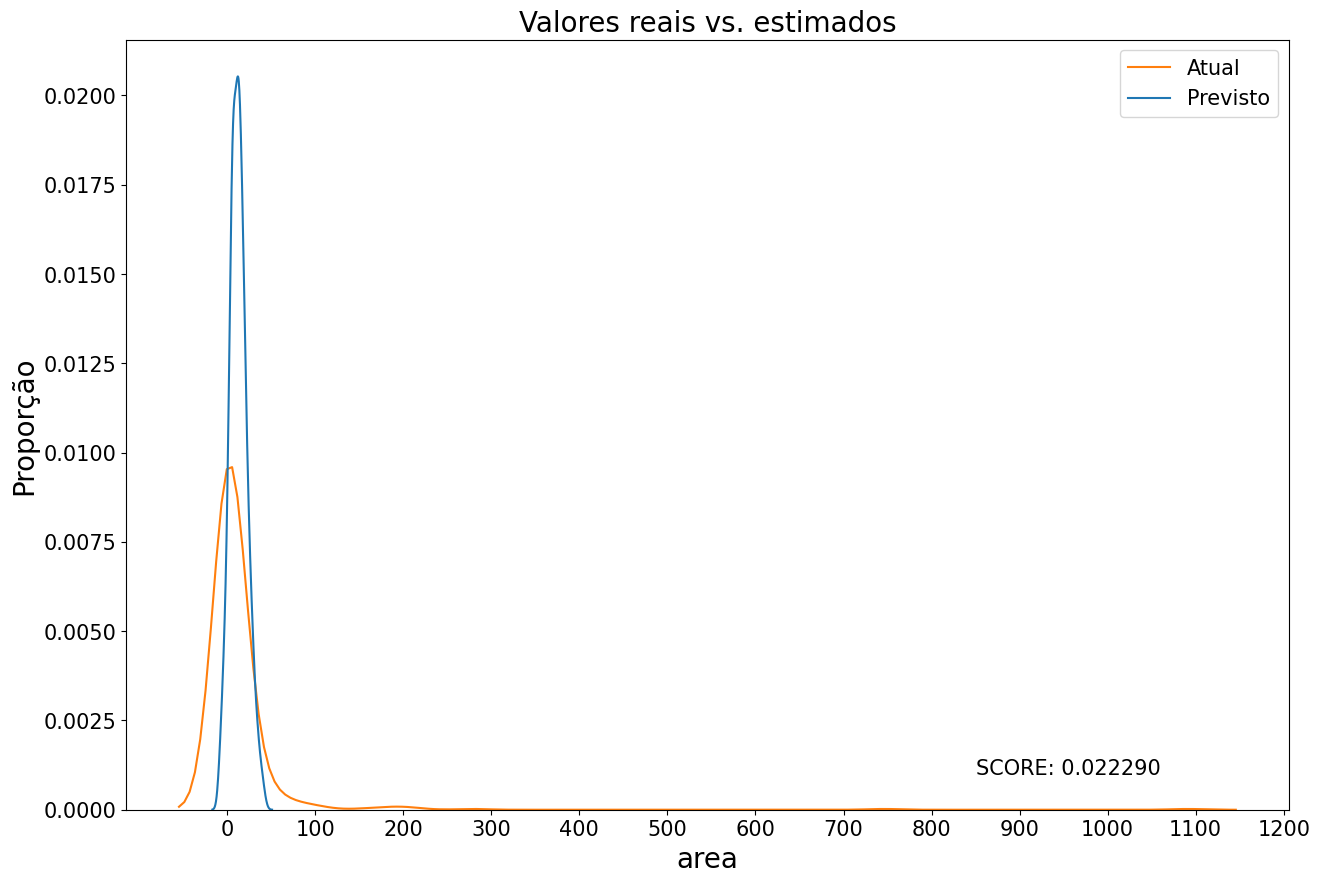

In [125]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_y[['YHat','area']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('area', size = 20)
plt.ylabel('Proporção', size = 20)
plt.yticks(size = 15)
plt.xticks(ticks=range(0, 1201, 100), size=15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))


tt = "SCORE: %4f" % R2_7

plt.text(850, 0.001, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

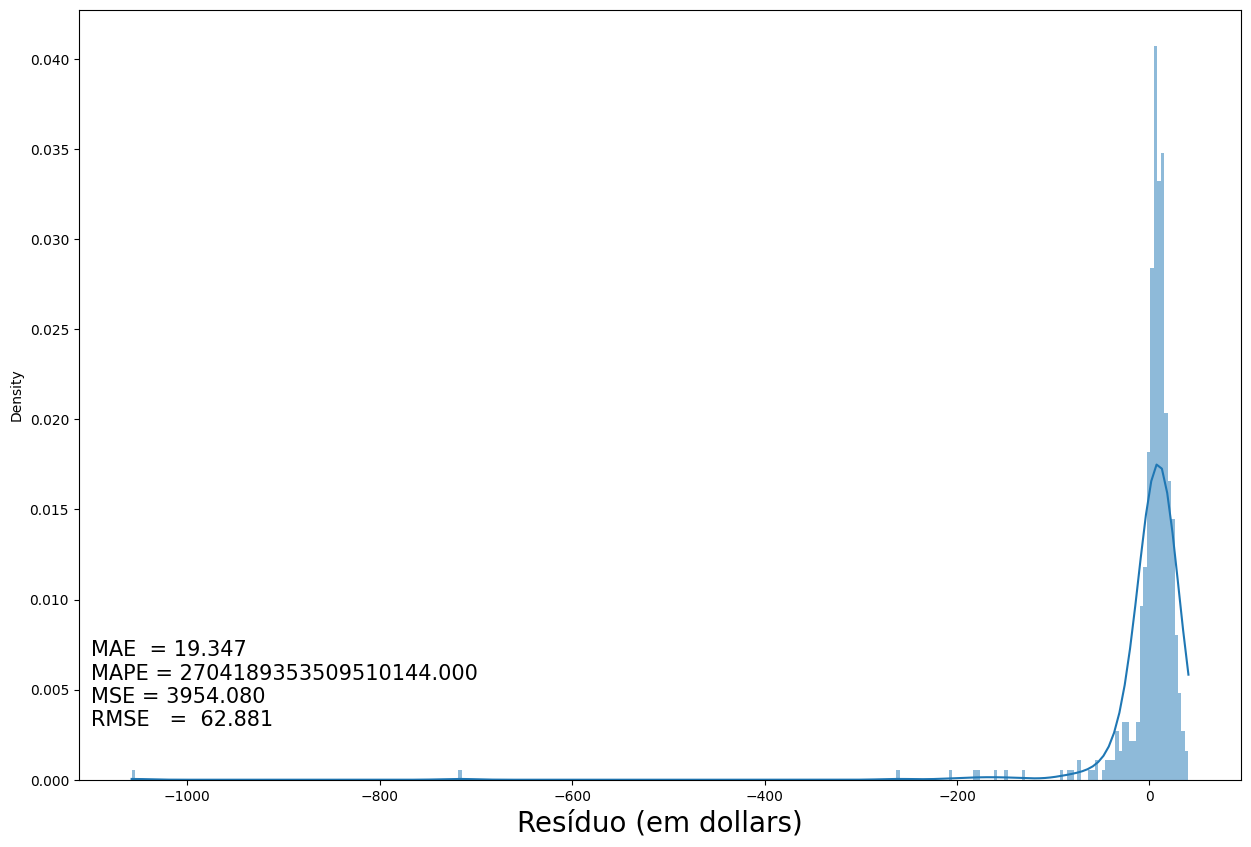

In [126]:
# Erro
df_y.loc[:,'Deviation'] = df_y['YHat']-df_y['area']

y_train = df_y['area']
y_pred  = df_y['YHat']

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=df_y['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-1100, 0.003, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

# Interpretações do Resultado

#Inicialmente, todas as colunas foram consideradas na análise. Variáveis categóricas, como 'month' e 'day', foram identificadas e convertidas em variáveis binárias para serem incluídas na análise final.

#Após a binarização e concatenação com as variáveis numéricas, foi possível identificar correlações entre as variáveis independentes e a variável dependente 'area'.

#Com isso, foi verificado o R² usando diferentes quantidades de variáveis independentes.

#Na análise com as 4 variáveis independentes mais relevantes, foi possível observar graficamente que o modelo apresentou melhor precisão.

#Os erros calculados foram:

##R² = 0.022290 (um valor baixo, indicando que o modelo não se ajusta bem aos dados)
#MAE = 19.347 (a média da diferença entre os valores reais e preditos)
#MAPE = 27041893535.000 (percentual médio de erro, elevado devido à baixa correlação das variáveis)
#MSE = 3954.080 (o erro quadrático médio, indicando a variabilidade dos erros)
#RMSE = 62.881 (a raiz quadrada do MSE, fornecendo uma medida mais interpretável de erro)

## O modelo apresenta baixo desempenho devido à fraca correlação entre as variáveis independentes e a variável dependente 'area'.